<a href="https://colab.research.google.com/github/drtayfunkok/The-AI-Team/blob/main/House_Price_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;"> Machine Learning  </p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;"> House Price Prediction  </p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:120%; text-align:center; border-radius:10px 10px;">Tayfun KOK</p>

# Importing Related Libraries

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Recognizing and Understanding the Dataset

In [2]:
df=pd.read_csv('/content/sample_data/raw_house_data.csv')
df.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10,10500,0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2,7300,0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3,None,None,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",None
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5,9019,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",None
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6,6396,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55


In [3]:
df.shape

(5000, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               5000 non-null   int64  
 1   sold_price        5000 non-null   float64
 2   zipcode           5000 non-null   int64  
 3   longitude         5000 non-null   float64
 4   latitude          5000 non-null   float64
 5   lot_acres         4990 non-null   float64
 6   taxes             5000 non-null   float64
 7   year_built        5000 non-null   int64  
 8   bedrooms          5000 non-null   int64  
 9   bathrooms         5000 non-null   object 
 10  sqrt_ft           5000 non-null   object 
 11  garage            5000 non-null   object 
 12  kitchen_features  5000 non-null   object 
 13  fireplaces        5000 non-null   object 
 14  floor_covering    5000 non-null   object 
 15  HOA               5000 non-null   object 
dtypes: float64(5), int64(4), object(7)
memory 

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms
count,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5000.000000,4990.000000,5.000000e+03,5000.00000,5000.000000
mean,2.127070e+07,7.746262e+05,85723.025600,-110.912107,32.308512,4.661317,9.402828e+03,1992.32800,3.933800
std,2.398508e+06,3.185556e+05,38.061712,0.120629,0.178028,51.685230,1.729385e+05,65.48614,1.245362
min,3.042851e+06,1.690000e+05,85118.000000,-112.520168,31.356362,0.000000,0.000000e+00,0.00000,1.000000
25%,2.140718e+07,5.850000e+05,85718.000000,-110.979260,32.277484,0.580000,4.803605e+03,1987.00000,3.000000
50%,2.161469e+07,6.750000e+05,85737.000000,-110.923420,32.318517,0.990000,6.223760e+03,1999.00000,4.000000
75%,2.180480e+07,8.350000e+05,85749.000000,-110.859078,32.394334,1.757500,8.082830e+03,2006.00000,4.000000
max,2.192856e+07,5.300000e+06,86323.000000,-109.454637,34.927884,2154.000000,1.221508e+07,2019.00000,36.000000


In [7]:
df.isnull().sum()

MLS                  0
sold_price           0
zipcode              0
longitude            0
latitude             0
lot_acres           10
taxes                0
year_built           0
bedrooms             0
bathrooms            0
sqrt_ft              0
garage               0
kitchen_features     0
fireplaces           0
floor_covering       0
HOA                  0
dtype: int64

In [8]:
fig= px.scatter_mapbox(
   df,
   lat="latitude",
   lon="longitude",
   width=850,
    height=600,
    color="sold_price",
    hover_data=["zipcode"],
)

fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [9]:
df1=df.copy()

# Data Cleaning & Handling with Missing Values

## MLS

In [10]:
df.MLS.nunique()

5000

All vaues of MLS are unique. Therefore, this column is not useful for machine learning models. So I will drop it. 

In [11]:
df.drop('MLS', axis=1, inplace=True)

In [12]:
df.shape

(5000, 15)

## sold_price

In [13]:
df.sold_price.describe()

count    5.000000e+03
mean     7.746262e+05
std      3.185556e+05
min      1.690000e+05
25%      5.850000e+05
50%      6.750000e+05
75%      8.350000e+05
max      5.300000e+06
Name: sold_price, dtype: float64

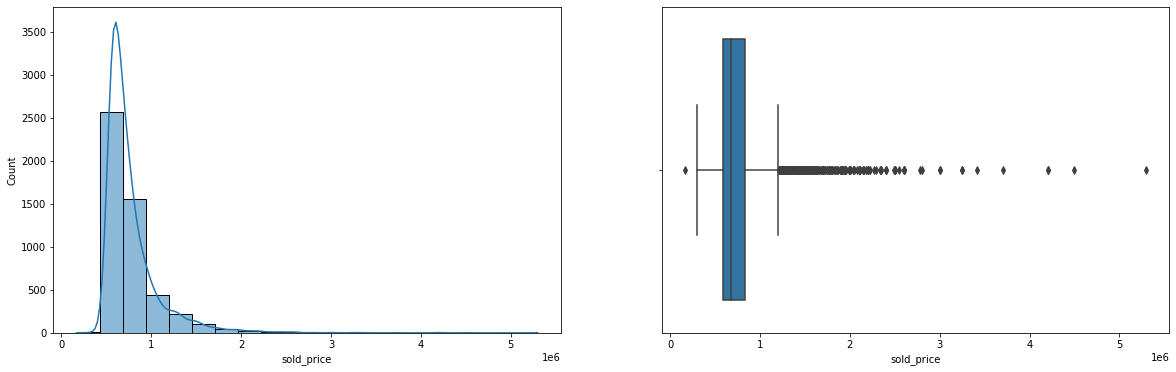

In [14]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
sns.histplot(df.sold_price, bins=20, kde=True)

plt.subplot(122)
sns.boxplot(df.sold_price)
plt.show()

In [15]:
Q1=np.percentile(df.sold_price,25)
Q3=np.percentile(df.sold_price,75)
IQR=stats.iqr(df.sold_price)
Q1,Q3,IQR

(585000.0, 835000.0, 250000.0)

In [16]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR
lower_lim,upper_lim

(210000.0, 1210000.0)

In [17]:
df[df.sold_price < lower_lim]

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
141,169000.0,85648,-110.918513,31.451945,0.52,80.83,2018,4,3,1700,2,None,0,Ceramic Tile,None


In [18]:
df=df[df.sold_price >= lower_lim]

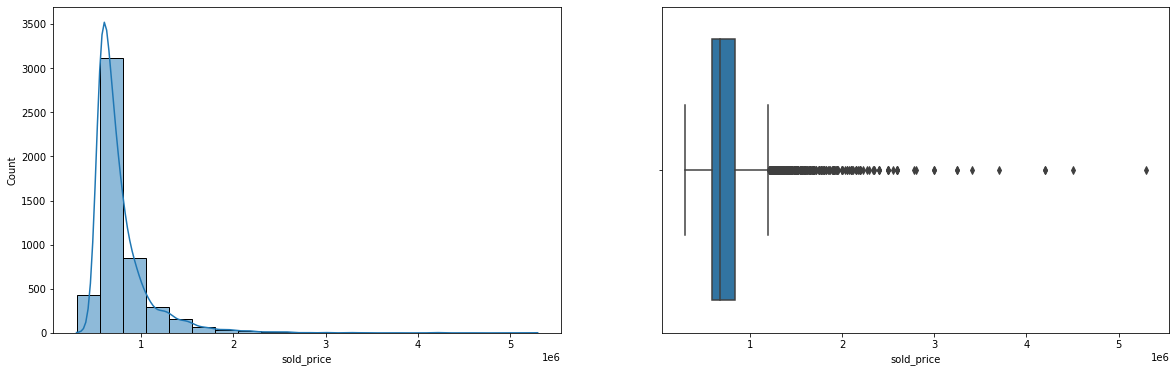

In [19]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
sns.histplot(df.sold_price, bins=20, kde=True)

plt.subplot(122)
sns.boxplot(df.sold_price)
plt.show()

In [20]:
df[df.sold_price >upper_lim].shape

(394, 15)

In [21]:
not_outliers = (df.sold_price >= lower_lim) & (df.sold_price <= upper_lim)
df=df[not_outliers]

In [22]:
df.shape

(4605, 15)

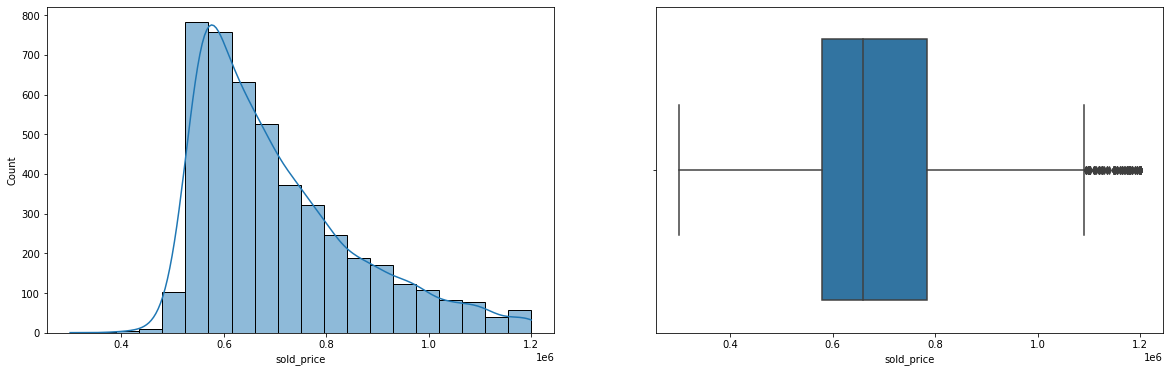

In [23]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
sns.histplot(df.sold_price, bins=20, kde=True)

plt.subplot(122)
sns.boxplot(df.sold_price)
plt.show()

## Zipcode

In [24]:
df.zipcode.dtype.type

numpy.int64

In [25]:
df.zipcode.nunique()

54

In [26]:
df.zipcode.value_counts(dropna=False)

85718    1187
85750     710
85755     432
85749     383
85737     277
85658     213
85742     158
85745     154
85739     148
85716     103
85704      97
85715      79
85743      76
85719      70
85641      66
85748      59
85646      56
85614      50
85712      41
85623      31
85622      29
85730      27
85637      23
85747      15
85629      14
85701      13
85705      11
85630       9
85645       9
85611       9
85624       8
85619       7
85711       6
85621       5
85648       4
85615       3
85710       2
85601       2
85643       2
85602       2
85610       2
85713       1
85638       1
85935       1
85625       1
85901       1
86323       1
85541       1
85929       1
85605       1
85118       1
85640       1
85603       1
85192       1
Name: zipcode, dtype: int64

## Longitude & Latitude

In [27]:
fig= px.scatter_mapbox(
   df,
   lat="latitude",
   lon="longitude",
   width=850,
    height=600,
    color="sold_price",
    hover_data=["zipcode"],
)

fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [28]:
df[df.latitude>33].shape

(6, 15)

In [29]:
df.drop(index=df[df.latitude>33].index, axis=0, inplace=True)

In [30]:
fig= px.scatter_mapbox(
   df,
   lat="latitude",
   lon="longitude",
   width=850,
    height=600,
    color="sold_price",
    hover_data=["zipcode"],
)

fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [31]:
df[df.latitude>32.9].shape

(1, 15)

In [32]:
df.drop(index=df[df.latitude>32.9].index, axis=0, inplace=True)

In [33]:
df[df.longitude>-110].shape

(6, 15)

In [34]:
fig= px.scatter_mapbox(
   df[df.longitude>-110],
   lat="latitude",
   lon="longitude",
   width=850,
    height=600,
    color="sold_price",
    hover_data=["zipcode"],
)

fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [35]:
df.drop(index=df[df.longitude>-110].index, axis=0, inplace=True)

In [36]:
fig= px.scatter_mapbox(
   df,
   lat="latitude",
   lon="longitude",
   width=850,
    height=600,
    color="sold_price",
    hover_data=["zipcode"],
)

fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [37]:
df[df.latitude<31.5].shape

(10, 15)

In [38]:
fig= px.scatter_mapbox(
   df[df.latitude<31.5],
   lat="latitude",
   lon="longitude",
   width=850,
    height=600,
    color="sold_price",
    hover_data=["zipcode"],
)

fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [39]:
df.drop(index=df[df.latitude<31.5].index, axis=0, inplace=True)

In [40]:
fig= px.scatter_mapbox(
   df,
   lat="latitude",
   lon="longitude",
   width=850,
    height=600,
    color="sold_price",
    hover_data=["zipcode"],
)

fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [41]:
df.zipcode.value_counts(dropna=False)

85718    1187
85750     710
85755     432
85749     383
85737     277
85658     213
85742     158
85745     154
85739     148
85716     103
85704      97
85715      79
85743      76
85719      70
85641      66
85748      59
85646      56
85614      50
85712      41
85623      31
85622      29
85730      27
85637      23
85747      15
85629      14
85701      13
85705      11
85645       9
85630       9
85624       8
85611       8
85619       7
85711       6
85648       3
85602       2
85710       2
85601       2
85640       1
85643       1
85713       1
85638       1
Name: zipcode, dtype: int64

In [42]:
ind=df.zipcode.value_counts(dropna=False).index[-8:]

In [43]:
for i in list(ind):
   df.drop(index=df[df.zipcode==i].index, axis=0, inplace=True) 

In [44]:
fig= px.scatter_mapbox(
   df,
   lat="latitude",
   lon="longitude",
   width=850,
    height=600,
    color="sold_price",
    hover_data=["zipcode"],
)

fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [45]:
df.shape

(4569, 15)

## lot_acres

In [46]:
df.lot_acres.isnull().sum()

10

In [47]:
df[df.lot_acres.isnull()]

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
967,695000.0,85645,-111.183593,31.702330,NaN,2480.58,1932,4,4,None,2,"Dishwasher, Double Sink, Gas Range, Refrigerat...",,Ceramic Tile,None
1659,700000.0,85646,-111.046366,31.623839,NaN,6740.66,2007,3,4,None,3,"Dishwasher, Double Sink, Freezer, Garbage Disp...",,Natural Stone,157
2564,680000.0,85622,-111.000925,31.836922,NaN,4158.40,2007,3,4,None,3,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",100
2939,655000.0,85614,-110.971212,31.835117,NaN,6433.00,2001,3,4,None,3,"Dishwasher, Double Sink, Electric Range, Garba...",,"Carpet, Ceramic Tile",83.33
3420,605000.0,85622,-111.009941,31.839620,NaN,6134.56,2012,4,4,None,2,"Compactor, Dishwasher, Double Sink, Garbage Di...",,"Carpet, Ceramic Tile",85
3530,580000.0,85622,-111.007069,31.846199,NaN,4498.01,1987,3,3,None,5,"Dishwasher, Double Sink, Electric Range, Garba...",1,"Carpet, Mexican Tile",None
4173,550000.0,85614,-110.940656,31.878329,NaN,5630.10,2013,3,4,None,3,"Dishwasher, Double Sink, Electric Range, Garba...",,"Carpet, Ceramic Tile",158
4286,584165.0,85622,-111.039164,31.790671,NaN,653.47,2012,2,2,None,3,"Dishwasher, Double Sink, Pantry: Closet, Count...",,Ceramic Tile,None
4365,545000.0,85614,-110.978688,31.832598,NaN,4817.00,2001,3,3,None,3,"Dishwasher, Double Sink, Garbage Disposal, Gas...",,"Carpet, Other: Travertine",33.33
4783,530000.0,85622,-111.009020,31.839576,NaN,5264.34,2009,3,4,None,2,"Dishwasher, Double Sink, Garbage Disposal, Gas...",,Ceramic Tile,85


In [48]:
df.drop(index=df[df.lot_acres.isnull()].index, axis=1, inplace=True)

In [49]:
df.lot_acres.isnull().sum()

0

In [50]:
df.lot_acres.describe()

count    4559.000000
mean        2.397002
std         8.840710
min         0.000000
25%         0.560000
50%         0.950000
75%         1.640000
max       277.000000
Name: lot_acres, dtype: float64

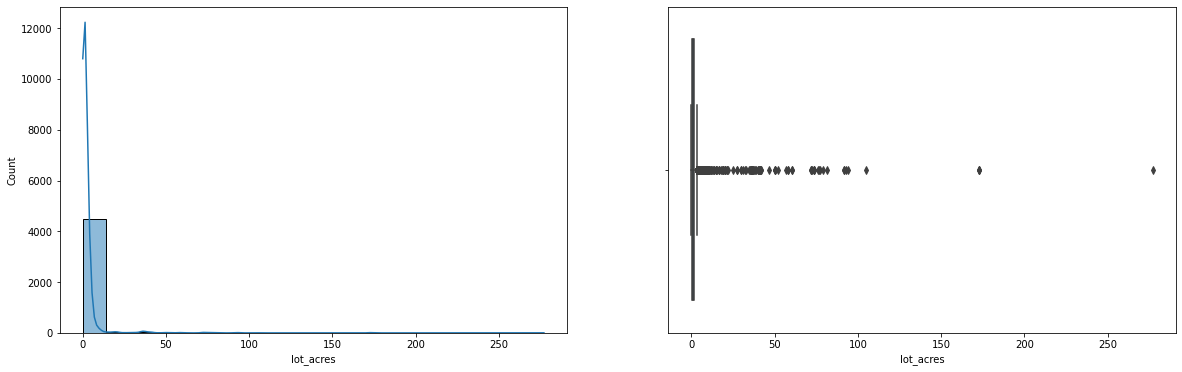

In [51]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
sns.histplot(df.lot_acres,bins=20,kde=True)

plt.subplot(122)
sns.boxplot(df.lot_acres)
plt.show()

## Taxes

In [52]:
df.taxes.describe()

count    4.559000e+03
mean     9.217320e+03
std      1.810994e+05
min      0.000000e+00
25%      4.768340e+03
50%      6.096000e+03
75%      7.675575e+03
max      1.221508e+07
Name: taxes, dtype: float64

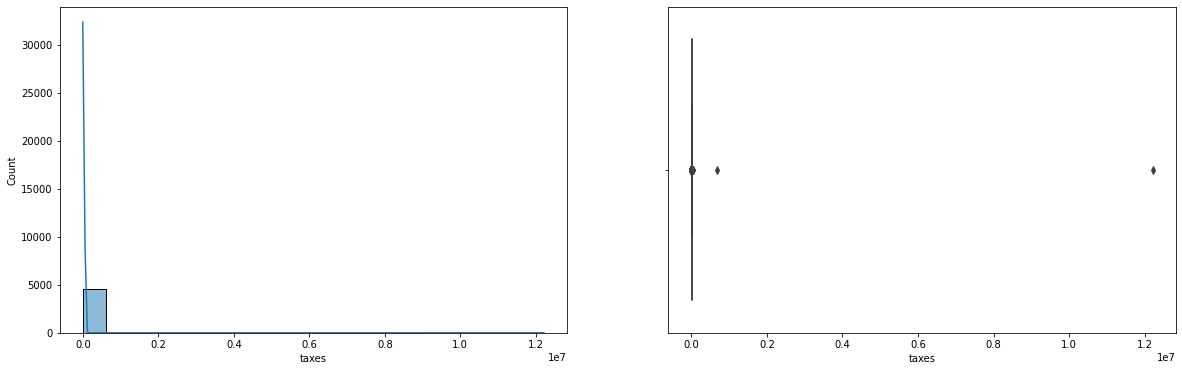

In [53]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
sns.histplot(df.taxes, bins=20, kde=True)

plt.subplot(122)
sns.boxplot(df.taxes);
plt.show()

In [54]:
df.taxes.sort_values(ascending=False)[:2]

715     12215075.0
1135      668059.0
Name: taxes, dtype: float64

In [55]:
df.drop(index=df.taxes.sort_values(ascending=False)[:2].index, axis=1, inplace=True)

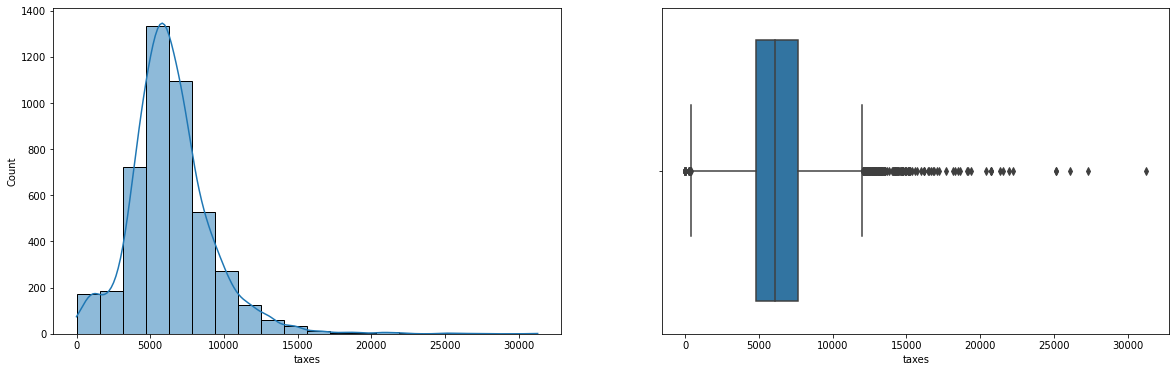

In [56]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
sns.histplot(df.taxes, bins=20, kde=True)

plt.subplot(122)
sns.boxplot(df.taxes);
plt.show()

## year_built 

In [57]:
df.year_built.dtype

dtype('int64')

In [58]:
df.year_built.value_counts(dropna=False)

2006    224
2002    215
2005    210
2007    204
2004    190
       ... 
1913      1
1923      1
1893      1
1943      1
1927      1
Name: year_built, Length: 111, dtype: int64

In [59]:
year_max=df.year_built.max()
year_max

2019

In [60]:
df["age"]=year_max-df.year_built

In [61]:
df.drop("year_built", axis=1, inplace=True)

In [62]:
df.head()

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,age
151,1200000.0,85750,-110.842117,32.275107,8.80,12946.09,7,11,10417,0,"Dishwasher, Garbage Disposal, Microwave, Oven",5,"Carpet, Mexican Tile, Wood",0,65
217,1100000.0,85755,-110.992897,32.461571,1.39,19156.00,4,4,5164,3,"Dishwasher, Freezer, Garbage Disposal, Refrige...",4,"Carpet, Natural Stone",153,18
219,1150000.0,85749,-110.718155,32.279066,11.49,10716.00,4,5,4330,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",3,"Carpet, Wood, Other",0,12
240,1200000.0,85750,-110.844774,32.326842,1.21,10610.26,4,4,4426,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",0,Natural Stone,117,17
259,1200000.0,85646,-111.040290,31.594518,91.70,8473.86,6,5,6884,0,None,7,"Carpet, Concrete",0,94


In [63]:
df.shape

(4557, 15)

In [64]:
df.age.value_counts()

13     224
17     215
14     210
12     204
15     190
      ... 
106      1
96       1
126      1
76       1
92       1
Name: age, Length: 111, dtype: int64

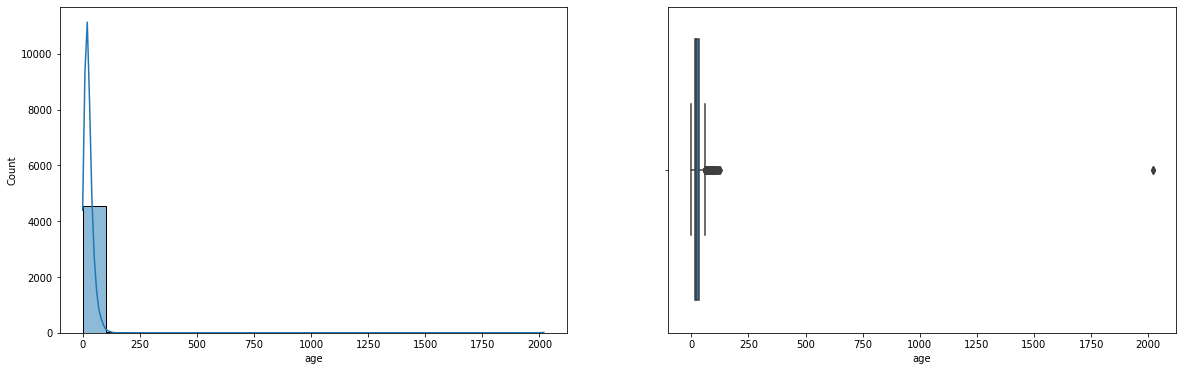

In [65]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
sns.histplot(df.age, bins=20, kde=True)

plt.subplot(122)
sns.boxplot(df.age);
plt.show()

In [66]:
df[df.age==df.age.max()]

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,age
946,695000.0,85645,-111.183593,31.702330,72.00,2480.58,4,4,2272,2,"Dishwasher, Refrigerator, Oven",2,Ceramic Tile,0,2019
1438,877170.0,85755,-110.977158,32.459429,0.60,2005.57,3,4,3078,3,"Dishwasher, Garbage Disposal, Microwave, Oven",0,Other,167,2019
1767,700000.0,85701,-110.963672,32.216996,0.13,7059.56,3,3,2500,3,"Dishwasher, Electric Range, Garbage Disposal, ...",0,Other: Recycled Porcelain,74,2019


In [67]:
df.drop(df[df.age==df.age.max()].index, axis=0, inplace=True)

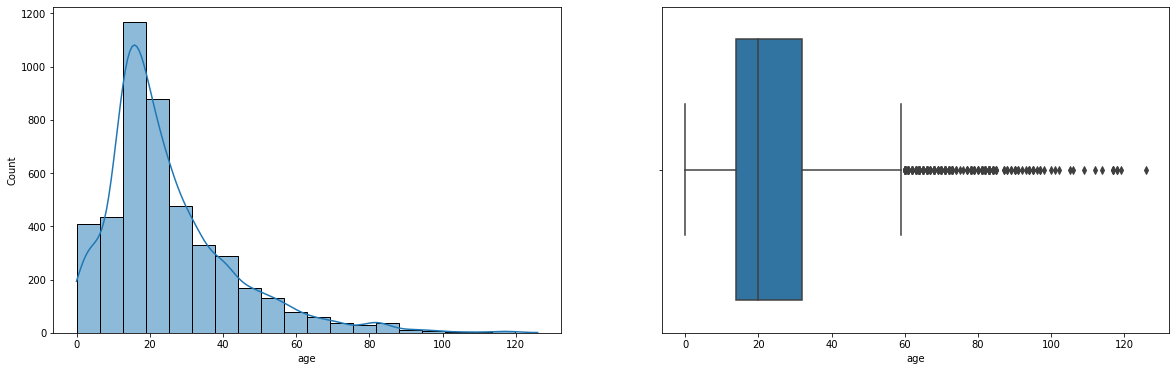

In [68]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
sns.histplot(df.age, bins=20, kde=True)

plt.subplot(122)
sns.boxplot(df.age);
plt.show()

In [69]:
Q1=np.percentile(df.age,25)
Q3=np.percentile(df.age,75)
IQR=stats.iqr(df.age)
Q1,Q3,IQR

(14.0, 32.0, 18.0)

In [70]:
lower_lim = Q1 - 2* IQR
upper_lim = Q3 + 2 * IQR
lower_lim,upper_lim

(-22.0, 68.0)

In [71]:
df[df.age>upper_lim].shape

(138, 15)

In [72]:
not_outliers = (df.age>= lower_lim) & (df.age<= upper_lim)
df[not_outliers].head()

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,age
151,1200000.0,85750,-110.842117,32.275107,8.80,12946.09,7,11,10417,0,"Dishwasher, Garbage Disposal, Microwave, Oven",5,"Carpet, Mexican Tile, Wood",0,65
217,1100000.0,85755,-110.992897,32.461571,1.39,19156.00,4,4,5164,3,"Dishwasher, Freezer, Garbage Disposal, Refrige...",4,"Carpet, Natural Stone",153,18
219,1150000.0,85749,-110.718155,32.279066,11.49,10716.00,4,5,4330,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",3,"Carpet, Wood, Other",0,12
240,1200000.0,85750,-110.844774,32.326842,1.21,10610.26,4,4,4426,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",0,Natural Stone,117,17
261,1200000.0,85718,-110.948790,32.354580,7.11,7324.90,3,3,3528,2,"Dishwasher, Garbage Disposal, Oven",1,"Carpet, Mexican Tile, Natural Stone",50,47


In [73]:
df=df[not_outliers]
df.shape

(4416, 15)

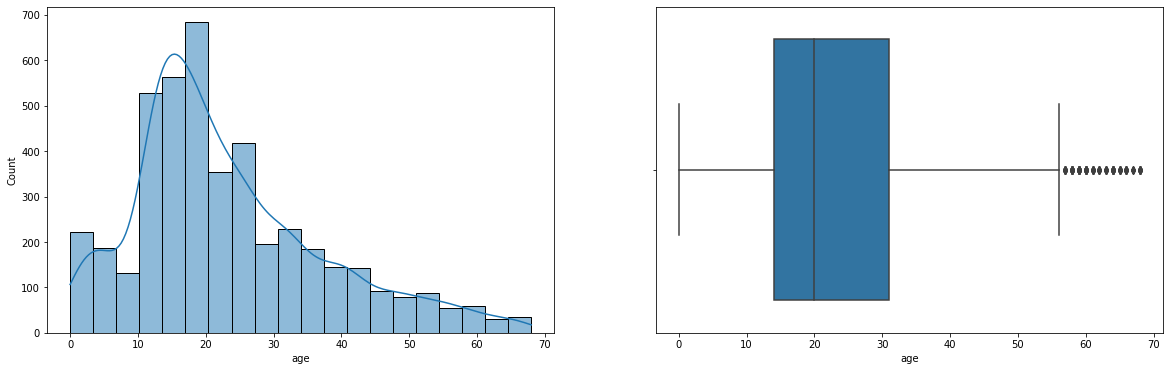

In [74]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
sns.histplot(df.age, bins=20, kde=True)

plt.subplot(122)
sns.boxplot(df.age)
plt.show()

## Bedrooms

In [75]:
df.bedrooms.value_counts()

4     2146
3     1268
5      748
2      145
6       83
7       17
10       3
8        2
1        2
9        1
18       1
Name: bedrooms, dtype: int64

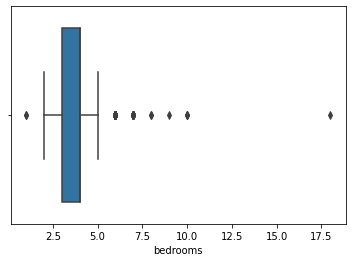

In [76]:
sns.boxplot(df.bedrooms);

In [77]:
df=df[(df.bedrooms>=2) & (df.bedrooms<=7)]
df.shape

(4407, 15)

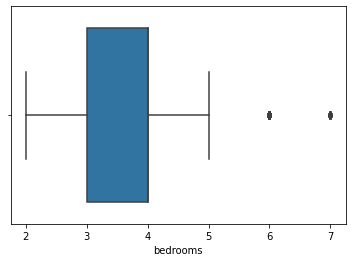

In [78]:
sns.boxplot(df.bedrooms);

## Bathrooms

In [79]:
df.bathrooms.value_counts()

3       1895
4       1669
5        492
2        177
6        125
7         27
None       6
8          5
3.5        5
2.5        3
11         1
9          1
36         1
Name: bathrooms, dtype: int64

In [80]:
df[df.bathrooms=='None']

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,age
2025,660000.0,85614,-110.969465,31.836723,3.60,5526.00,3,None,None,3,"Desk, Dishwasher, Garbage Disposal, Gas Range,...",,"Carpet, Other: Tile-Other","1,000",12
2766,575000.0,85614,-110.960497,31.854446,0.87,4623.05,3,None,None,3,"Dishwasher, Garbage Disposal, Gas Range, Islan...",,"Carpet, Other",250,17
3108,610000.0,85614,-111.002544,31.840061,1.70,3800.00,3,None,None,3,None,,None,"1,200",12
3529,535000.0,85614,-110.986426,31.806614,4.27,3826.25,2,None,None,3,"Dishwasher, Garbage Disposal, Gas Range, Islan...",,"Carpet, Other: Tile-Other",None,13
3822,550000.0,85614,-111.008754,31.841141,0.99,3702.07,2,None,None,3,"Dishwasher, Garbage Disposal, Island, Lazy Sus...",,"Carpet, Other: Tile-Other","1,200",12
4812,500000.0,85646,-111.051431,31.636207,1.03,8102.00,4,None,None,2,"Dishwasher, Electric Range, Garbage Disposal, ...",,"Carpet, Mexican Tile",250,20


In [81]:
df.bathrooms.replace("None",np.nan,inplace=True)

In [82]:
df.bathrooms.isnull().sum()

6

In [83]:
df.bathrooms.dtype

dtype('O')

In [84]:
df.bathrooms=df.bathrooms.astype("float64")

In [85]:
for group in df["bedrooms"].unique():
    cond = df["bedrooms"]==group
    mode = df[cond]["bathrooms"].mode().to_list()  # list(df[cond]["body_type"].mode())
    if mode != []:
        df.loc[cond, "bathrooms"] = df.loc[cond, "bathrooms"].fillna(df[cond]["bathrooms"].mode()[0])
    else:
        df.loc[cond, "bathrooms"] = df.loc[cond, "bathrooms"].fillna(df["bathrooms"].mode()[0])

In [86]:
df.bathrooms.isnull().sum()

0

In [87]:
df.bathrooms.value_counts()

3.0     1901
4.0     1669
5.0      492
2.0      177
6.0      125
7.0       27
8.0        5
3.5        5
2.5        3
11.0       1
9.0        1
36.0       1
Name: bathrooms, dtype: int64

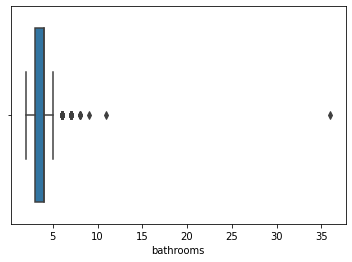

In [88]:
sns.boxplot(df.bathrooms);

In [89]:
df[df.bathrooms==3.5]

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,age
1665,700000.0,85646,-111.046301,31.623803,0.47,6740.66,3,3.5,3883,2,"Dishwasher, Double Sink, Freezer, Garbage Disp...",2,Natural Stone,None,12
1666,715000.0,85646,-111.061580,31.618304,5.08,4484.14,3,3.5,3596,2,Island,3,Ceramic Tile,None,17
2450,620000.0,85646,-111.066643,31.601812,10.31,5365.14,3,3.5,2849,3,"Compactor, Dishwasher, Double Sink, Garbage Di...",3,"Ceramic Tile, Wood",None,15
3992,500000.0,85646,-111.069587,31.619429,4.14,4875.24,2,3.5,3623,2,"Dishwasher, Double Sink, Garbage Disposal, Gas...",3,Mexican Tile,None,27
4802,500000.0,85646,-111.049836,31.636602,1.03,8100.00,4,3.5,3200,2,"Dishwasher, Double Sink, Electric Range, Garba...",4,"Carpet, Mexican Tile",250,20


In [90]:
df[df.bathrooms==2.5]

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,age
2567,614000.0,85646,-111.047281,31.600674,0.46,4911.0,3,2.5,2950,3,"Garbage Disposal, Gas Range, Island, Lazy Susa...",1,"Concrete, Natural Stone",None,14
4129,595000.0,85646,-111.052252,31.631355,1.14,3921.0,3,2.5,2882,2,"Dishwasher, Double Sink, Garbage Disposal, Gas...",2,"Carpet, Natural Stone",250,22
4726,510000.0,85646,-111.089785,31.583593,7.00,4235.3,3,2.5,2765,2,"Compactor, Dishwasher, Double Sink, Garbage Di...",2,Wood,210,24


In [91]:
df.bathrooms.replace({3.5:4, 2.5:3}, inplace=True)

In [92]:
df.bathrooms.value_counts()

3.0     1904
4.0     1674
5.0      492
2.0      177
6.0      125
7.0       27
8.0        5
11.0       1
9.0        1
36.0       1
Name: bathrooms, dtype: int64

In [93]:
df=df[(df.bathrooms>=2) & (df.bathrooms<=7)]
df.shape

(4399, 15)

In [94]:
df.bathrooms.value_counts()

3.0    1904
4.0    1674
5.0     492
2.0     177
6.0     125
7.0      27
Name: bathrooms, dtype: int64

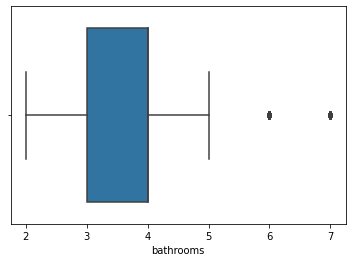

In [95]:
sns.boxplot(df.bathrooms);

## sqrt_ft

In [96]:
df.sqrt_ft.value_counts()

3541    49
None    43
3052    25
3420    18
3811    16
        ..
4424     1
3723     1
3937     1
5255     1
2318     1
Name: sqrt_ft, Length: 2083, dtype: int64

In [97]:
df.sqrt_ft.replace("None",np.nan,inplace=True)

In [98]:
df.sqrt_ft.dtype

dtype('O')

In [99]:
df.sqrt_ft=df.sqrt_ft.astype("float64")
df.sqrt_ft.dtype

dtype('float64')

In [100]:
df.sqrt_ft.describe()

count     4356.000000
mean      3565.107346
std        839.803266
min       1100.000000
25%       3020.750000
50%       3451.000000
75%       3980.750000
max      12808.000000
Name: sqrt_ft, dtype: float64

In [101]:
df.corr()["sqrt_ft"].sort_values(ascending=False)

sqrt_ft       1.000000
bathrooms     0.647981
taxes         0.557799
sold_price    0.507998
bedrooms      0.505720
longitude     0.075305
age           0.065624
lot_acres     0.064460
zipcode       0.059778
latitude     -0.078671
Name: sqrt_ft, dtype: float64

In [102]:
for group in df["bathrooms"].unique():
    cond = df["bathrooms"]==group
    mode = df[cond]["sqrt_ft"].mode().to_list()  # list(df[cond]["body_type"].mode())
    if mode != []:
        df.loc[cond, "sqrt_ft"] = df.loc[cond, "sqrt_ft"].fillna(df[cond]["sqrt_ft"].mode()[0])
    else:
        df.loc[cond, "sqrt_ft"] = df.loc[cond, "sqrt_ft"].fillna(df["sqrt_ft"].mode()[0])

In [103]:
df.sqrt_ft.isnull().sum()

0

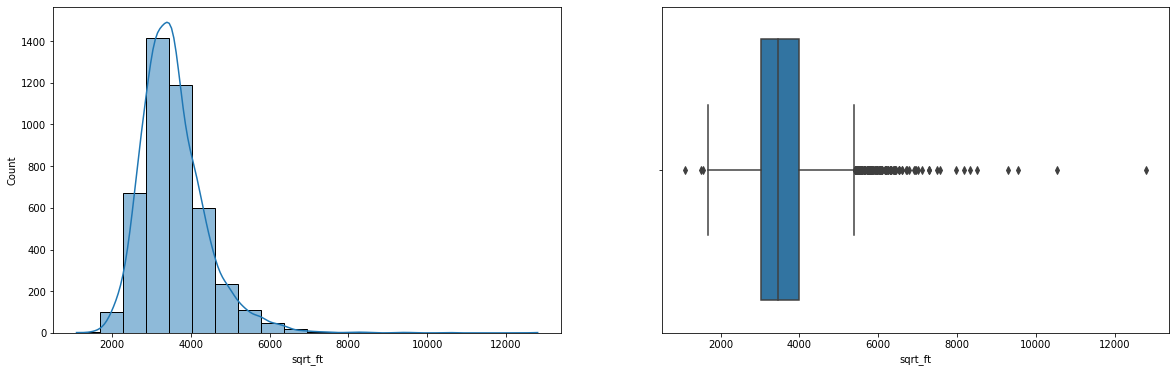

In [104]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
sns.histplot(df.sqrt_ft, bins=20, kde=True)

plt.subplot(122)
sns.boxplot(df.sqrt_ft)
plt.show()

In [105]:
df.sqrt_ft.sort_values(ascending=False)[:20]

1065    12808.0
778     10529.0
473      9548.0
629      9284.0
973      8511.0
266      8322.0
686      8177.0
3214     7983.0
780      7571.0
2018     7495.0
643      7284.0
837      7277.0
343      7113.0
392      7002.0
1099     6949.0
1111     6935.0
796      6902.0
3772     6789.0
1085     6742.0
446      6712.0
Name: sqrt_ft, dtype: float64

In [106]:
df.drop(index=df[df.sqrt_ft>7000].index, axis=1, inplace=True)

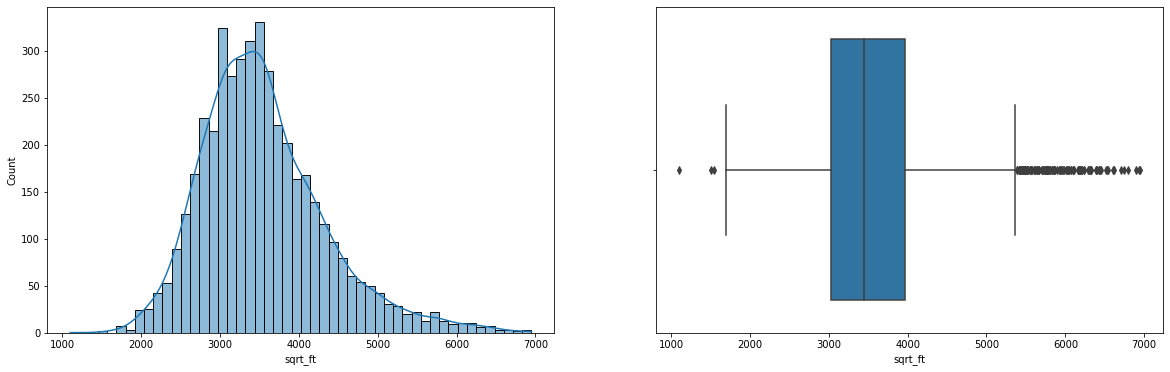

In [107]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
sns.histplot(df.sqrt_ft, bins=50, kde=True)

plt.subplot(122)
sns.boxplot(df.sqrt_ft)
plt.show()

In [108]:
df.sqrt_ft.sort_values()[:20]

4152    1100.0
4054    1512.0
1164    1544.0
2549    1690.0
4880    1690.0
4964    1721.0
1588    1774.0
1070    1774.0
3124    1780.0
4024    1780.0
3252    1867.0
4925    1900.0
3803    1910.0
4132    1925.0
4139    1930.0
2715    1942.0
3539    1942.0
2138    1942.0
4876    1957.0
2770    1957.0
Name: sqrt_ft, dtype: float64

In [109]:
df.drop(index=4152, axis=1, inplace=True)

In [110]:
df.shape

(4384, 15)

## Garage

In [111]:
df.garage.value_counts()

3       2517
2       1226
4        302
0         96
5         69
6         53
2.5       44
1         18
3.5       16
8         12
7         11
9          6
10         3
12         3
4.5        2
20         1
11         1
None       1
30         1
22         1
13         1
Name: garage, dtype: int64

In [112]:
df.garage.replace("None",np.nan, inplace=True)

In [113]:
df.garage.value_counts(dropna=False)

3      2517
2      1226
4       302
0        96
5        69
6        53
2.5      44
1        18
3.5      16
8        12
7        11
9         6
10        3
12        3
4.5       2
20        1
11        1
NaN       1
30        1
22        1
13        1
Name: garage, dtype: int64

In [114]:
df.garage.dtype

dtype('O')

In [115]:
df.garage=df.garage.astype("float64")

In [116]:
df.corr()["garage"].sort_values(ascending=False)

garage        1.000000
sqrt_ft       0.234261
bathrooms     0.212107
bedrooms      0.148042
taxes         0.136997
sold_price    0.135194
zipcode       0.071518
latitude      0.055685
lot_acres    -0.008261
longitude    -0.041065
age          -0.244963
Name: garage, dtype: float64

In [117]:
df.garage.mode()[0]

3.0

In [118]:
df.garage.fillna(df.garage.mode()[0], inplace=True)

In [119]:
df.garage.value_counts(dropna=False)

3.0     2518
2.0     1226
4.0      302
0.0       96
5.0       69
6.0       53
2.5       44
1.0       18
3.5       16
8.0       12
7.0       11
9.0        6
12.0       3
10.0       3
4.5        2
22.0       1
30.0       1
11.0       1
20.0       1
13.0       1
Name: garage, dtype: int64

In [120]:
df.garage.replace({2.5:3, 3.5:4, 4.5:5}, inplace=True)

In [121]:
df.garage.value_counts(dropna=False)

3.0     2562
2.0     1226
4.0      318
0.0       96
5.0       71
6.0       53
1.0       18
8.0       12
7.0       11
9.0        6
12.0       3
10.0       3
22.0       1
30.0       1
11.0       1
20.0       1
13.0       1
Name: garage, dtype: int64

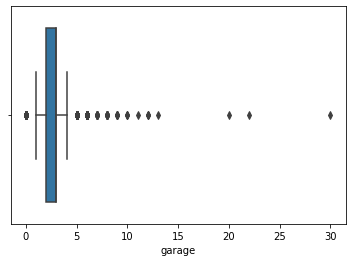

In [122]:
sns.boxplot(df.garage);

In [123]:
df=df[df.garage<=7]
df.shape

(4355, 15)

In [124]:
df.garage.value_counts(dropna=False)

3.0    2562
2.0    1226
4.0     318
0.0      96
5.0      71
6.0      53
1.0      18
7.0      11
Name: garage, dtype: int64

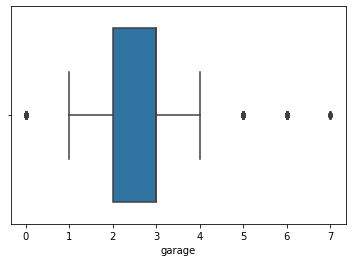

In [125]:
sns.boxplot(df.garage);

## kitchen_features

In [126]:
df.kitchen_features

217     Dishwasher, Freezer, Garbage Disposal, Refrige...
219     Dishwasher, Garbage Disposal, Refrigerator, Mi...
240     Dishwasher, Garbage Disposal, Refrigerator, Mi...
261                    Dishwasher, Garbage Disposal, Oven
265             Dishwasher, Refrigerator, Microwave, Oven
                              ...                        
4993    Dishwasher, Double Sink, Electric Range, Garba...
4994    Dishwasher, Double Sink, Electric Range, Garba...
4995    Dishwasher, Double Sink, Garbage Disposal, Gas...
4996    Dishwasher, Double Sink, Electric Range, Garba...
4998    Dishwasher, Double Sink, Garbage Disposal, Gas...
Name: kitchen_features, Length: 4355, dtype: object

In [127]:
df.kitchen_features.nunique()

1634

In [128]:
df.drop("kitchen_features", axis=1, inplace=True)

In [129]:
df.head()

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,floor_covering,HOA,age
217,1100000.0,85755,-110.992897,32.461571,1.39,19156.00,4,4.0,5164.0,3.0,4,"Carpet, Natural Stone",153,18
219,1150000.0,85749,-110.718155,32.279066,11.49,10716.00,4,5.0,4330.0,3.0,3,"Carpet, Wood, Other",0,12
240,1200000.0,85750,-110.844774,32.326842,1.21,10610.26,4,4.0,4426.0,3.0,0,Natural Stone,117,17
261,1200000.0,85718,-110.948790,32.354580,7.11,7324.90,3,3.0,3528.0,2.0,1,"Carpet, Mexican Tile, Natural Stone",50,47
265,1120150.0,85658,-111.060142,32.456128,2.98,13573.00,4,6.0,4050.0,4.0,2,"Carpet, Natural Stone, Wood",149,12


In [130]:
df.shape

(4355, 14)

## fireplaces

In [131]:
df.fireplaces.value_counts(dropna=False)

1    1671
2    1428
3     708
0     283
4     201
5      42
       17
7       2
6       2
9       1
Name: fireplaces, dtype: int64

In [132]:
df[df.fireplaces==" "]

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,floor_covering,HOA,age
1729,675000.0,85629,-110.961128,31.869810,1.02,4662.64,3,4.0,3541.0,3.0,,"Carpet, Mexican Tile, Wood, Other: Tile-Other",149.5,12
1730,700000.0,85645,-111.239637,31.662369,172.76,7501.42,3,3.0,3052.0,2.0,,"Carpet, Ceramic Tile, Mexican Tile",None,19
1863,750000.0,85622,-111.002640,31.846861,4.58,4578.00,5,4.0,3541.0,4.0,,"Natural Stone, Other: Travertine & Slate",None,42
2025,660000.0,85614,-110.969465,31.836723,3.60,5526.00,3,3.0,3052.0,3.0,,"Carpet, Other: Tile-Other","1,000",12
2357,690000.0,85646,-111.052693,31.630004,1.85,4884.00,3,4.0,3541.0,3.0,,Ceramic Tile,21,22
2635,650000.0,85646,-111.043573,31.633469,0.90,4235.00,3,3.0,3052.0,3.0,,"Carpet, Ceramic Tile",22,34
2766,575000.0,85614,-110.960497,31.854446,0.87,4623.05,3,3.0,3052.0,3.0,,"Carpet, Other",250,17
2876,560100.0,85646,-111.050957,31.626585,0.78,4716.00,3,3.0,3052.0,3.0,,"Carpet, Mexican Tile",21,20
2917,580000.0,85629,-110.941544,31.879379,0.27,765.87,2,3.0,3052.0,3.0,,"Ceramic Tile, Wood",148,5
2932,625000.0,85614,-110.960215,31.857286,0.97,5518.75,3,3.0,3052.0,3.0,,"Carpet, Other: Porcelain Tile",16.66,12


In [133]:
df.fireplaces.replace(" ", np.nan,inplace=True)

In [134]:
df.fireplaces.value_counts(dropna=False)

1      1671
2      1428
3       708
0       283
4       201
5        42
NaN      17
7         2
6         2
9         1
Name: fireplaces, dtype: int64

In [135]:
for group in df["bedrooms"].unique():
    cond = df["bedrooms"]==group
    mode = df[cond]["fireplaces"].mode().to_list()  # list(df[cond]["body_type"].mode())
    if mode != []:
        df.loc[cond, "fireplaces"] = df.loc[cond, "fireplaces"].fillna(df[cond]["fireplaces"].mode()[0])
    else:
        df.loc[cond, "fireplaces"] = df.loc[cond, "fireplaces"].fillna(df["fireplaces"].mode()[0])

In [136]:
df.fireplaces.value_counts(dropna=False)

1    1687
2    1429
3     708
0     283
4     201
5      42
7       2
6       2
9       1
Name: fireplaces, dtype: int64

In [137]:
df.fireplaces=df.fireplaces.astype("int64")

In [138]:
df=df[df.fireplaces<=5]
df.shape

(4350, 14)

In [139]:
df.fireplaces.value_counts(dropna=False)

1    1687
2    1429
3     708
0     283
4     201
5      42
Name: fireplaces, dtype: int64

## floor_covering

In [140]:
df.floor_covering.value_counts(dropna=False)

Carpet, Ceramic Tile                               1200
Carpet, Natural Stone                               490
Carpet, Ceramic Tile, Wood                          239
Ceramic Tile                                        224
Concrete                                            217
                                                   ... 
Other: travertine                                     1
Ceramic Tile, Wood, Other: Travertine Accents         1
Carpet, Ceramic Tile, Mexican Tile, Wood, Other       1
Other: Luxury Vinyl                                   1
Concrete, Other: Cork                                 1
Name: floor_covering, Length: 270, dtype: int64

In [141]:
df.floor_covering.nunique()

270

In [142]:
df.drop("floor_covering", axis=1, inplace=True)

In [143]:
df.head()

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA,age
217,1100000.0,85755,-110.992897,32.461571,1.39,19156.00,4,4.0,5164.0,3.0,4,153,18
219,1150000.0,85749,-110.718155,32.279066,11.49,10716.00,4,5.0,4330.0,3.0,3,0,12
240,1200000.0,85750,-110.844774,32.326842,1.21,10610.26,4,4.0,4426.0,3.0,0,117,17
261,1200000.0,85718,-110.948790,32.354580,7.11,7324.90,3,3.0,3528.0,2.0,1,50,47
265,1120150.0,85658,-111.060142,32.456128,2.98,13573.00,4,6.0,4050.0,4.0,2,149,12


In [144]:
df.shape

(4350, 13)

## HOA

In [145]:
df.HOA.value_counts()

0        649
None     441
5        119
100      104
50        80
        ... 
390        1
73.33      1
149.5      1
73.72      1
78.65      1
Name: HOA, Length: 355, dtype: int64

In [146]:
df.HOA.replace("None",np.nan,inplace=True)

In [147]:
df.HOA.isnull().sum()

441

In [148]:
df.HOA.fillna(method="ffill", inplace=True)

In [149]:
df.HOA.isnull().sum()

0

In [150]:
df.HOA=df.HOA.str.replace(',', '').astype("float") 

In [151]:
df.HOA.dtype

dtype('float64')

In [152]:
df.HOA.value_counts()

0.00      680
5.00      141
100.00    121
50.00      86
40.00      75
         ... 
58.36       1
97.66       1
136.00      1
221.00      1
78.65       1
Name: HOA, Length: 354, dtype: int64

In [153]:
df.HOA.describe()

count    4350.000000
mean       83.018616
std       179.976862
min         0.000000
25%        11.000000
50%        55.000000
75%       125.000000
max      8333.000000
Name: HOA, dtype: float64

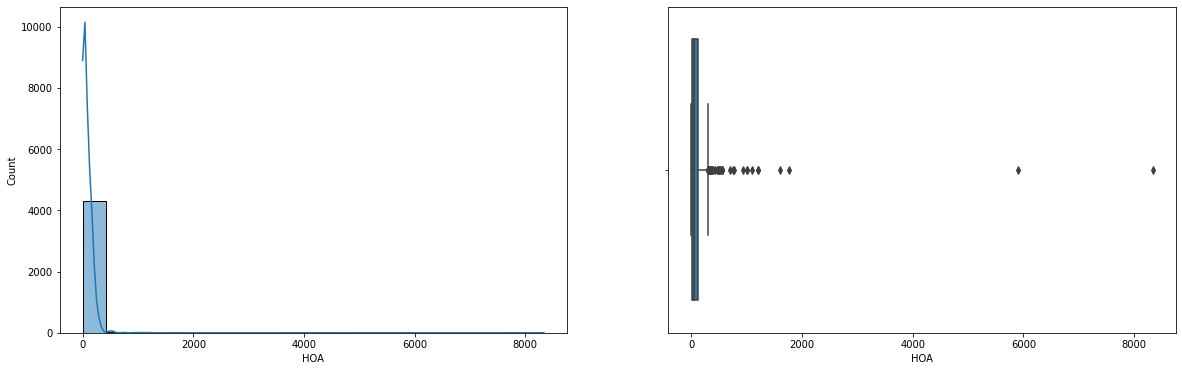

In [154]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
sns.histplot(df.HOA, bins=20, kde=True);

plt.subplot(122)
sns.boxplot(df.HOA);

plt.show()

In [155]:
df.HOA.sort_values(ascending=False)[:20]

2938    8333.0
2860    5900.0
1642    1769.0
487     1600.0
3108    1200.0
3822    1200.0
1694    1100.0
819     1010.0
2025    1000.0
4063     925.0
2956     765.0
3497     750.0
384      700.0
693      550.0
919      550.0
736      550.0
355      550.0
1239     550.0
1128     550.0
885      550.0
Name: HOA, dtype: float64

In [156]:
Q1=np.percentile(df.HOA,25)
Q3=np.percentile(df.HOA,75)
IQR=stats.iqr(df.HOA)
Q1,Q3,IQR

(11.0, 125.0, 114.0)

In [157]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR
lower_lim,upper_lim

(-160.0, 296.0)

In [158]:
df[df.HOA>upper_lim].shape

(68, 13)

In [159]:
not_outliers = (df.HOA>= lower_lim) & (df.HOA<= upper_lim)
df[not_outliers].head()

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA,age
217,1100000.0,85755,-110.992897,32.461571,1.39,19156.00,4,4.0,5164.0,3.0,4,153.0,18
219,1150000.0,85749,-110.718155,32.279066,11.49,10716.00,4,5.0,4330.0,3.0,3,0.0,12
240,1200000.0,85750,-110.844774,32.326842,1.21,10610.26,4,4.0,4426.0,3.0,0,117.0,17
261,1200000.0,85718,-110.948790,32.354580,7.11,7324.90,3,3.0,3528.0,2.0,1,50.0,47
265,1120150.0,85658,-111.060142,32.456128,2.98,13573.00,4,6.0,4050.0,4.0,2,149.0,12


In [160]:
df=df[not_outliers]
df.shape

(4282, 13)

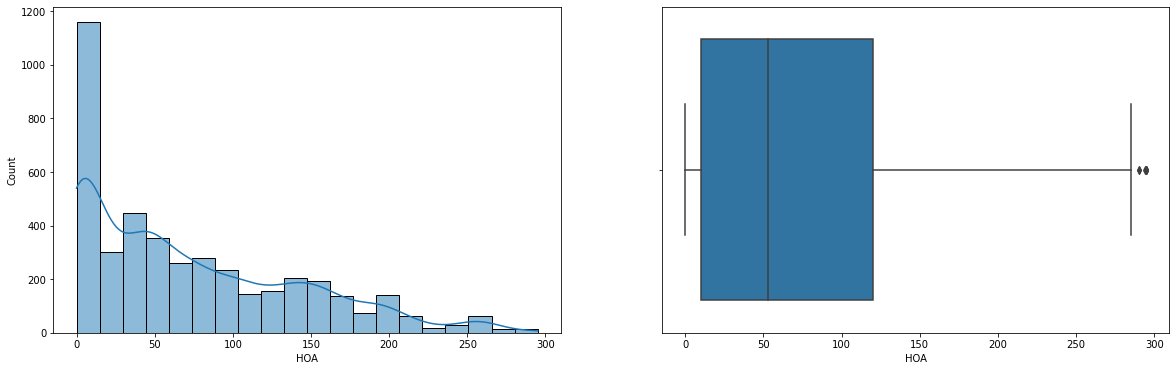

In [161]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
sns.histplot(df.HOA, bins=20, kde=True);

plt.subplot(122)
sns.boxplot(df.HOA);

plt.show()

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4282 entries, 217 to 4998
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sold_price  4282 non-null   float64
 1   zipcode     4282 non-null   int64  
 2   longitude   4282 non-null   float64
 3   latitude    4282 non-null   float64
 4   lot_acres   4282 non-null   float64
 5   taxes       4282 non-null   float64
 6   bedrooms    4282 non-null   int64  
 7   bathrooms   4282 non-null   float64
 8   sqrt_ft     4282 non-null   float64
 9   garage      4282 non-null   float64
 10  fireplaces  4282 non-null   int64  
 11  HOA         4282 non-null   float64
 12  age         4282 non-null   int64  
dtypes: float64(9), int64(4)
memory usage: 468.3 KB


In [163]:
df.reset_index(drop=True, inplace=True)

In [164]:
df.corr()

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA,age
sold_price,1.000000,0.079027,-0.022622,0.113912,0.000698,0.529396,0.159677,0.389585,0.518845,0.177780,0.323577,0.233923,-0.132447
zipcode,0.079027,1.000000,0.097307,0.462351,-0.226421,0.046404,0.148275,0.009511,0.071335,0.081175,0.031623,-0.051081,0.038396
longitude,-0.022622,0.097307,1.000000,-0.276374,0.168282,-0.081389,0.092651,0.004715,0.083072,-0.066562,0.072747,-0.035573,0.160519
latitude,0.113912,0.462351,-0.276374,1.000000,-0.398557,0.085630,-0.011252,0.004399,-0.048934,0.099210,-0.073180,0.166456,-0.137019
lot_acres,0.000698,-0.226421,0.168282,-0.398557,1.000000,0.064705,-0.018819,-0.012010,0.024789,-0.059846,0.043844,-0.063821,0.055788
taxes,0.529396,0.046404,-0.081389,0.085630,0.064705,1.000000,0.209547,0.342580,0.534017,0.164081,0.356432,0.147803,-0.002765
bedrooms,0.159677,0.148275,0.092651,-0.011252,-0.018819,0.209547,1.000000,0.451114,0.513825,0.166965,0.170844,-0.201112,0.109193
bathrooms,0.389585,0.009511,0.004715,0.004399,-0.012010,0.342580,0.451114,1.000000,0.649828,0.240229,0.205578,0.021026,-0.024338
sqrt_ft,0.518845,0.071335,0.083072,-0.048934,0.024789,0.534017,0.513825,0.649828,1.000000,0.272265,0.346637,-0.023805,0.073311
garage,0.177780,0.081175,-0.066562,0.099210,-0.059846,0.164081,0.166965,0.240229,0.272265,1.000000,0.052908,0.005554,-0.330370


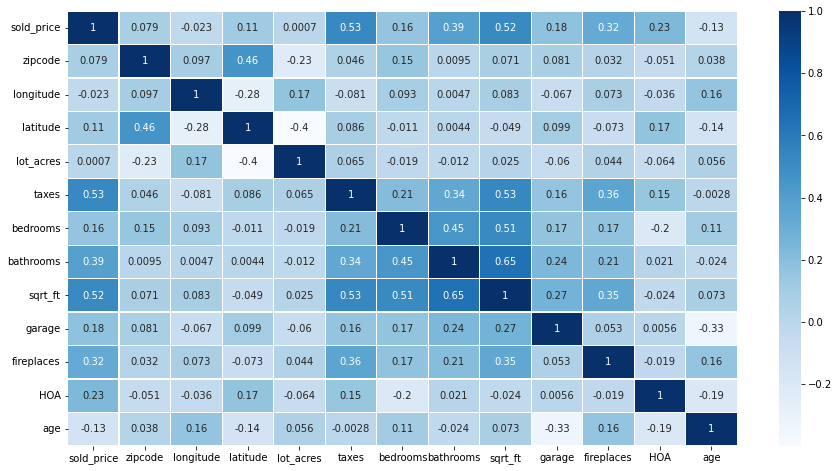

In [165]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True, cmap="Blues",linewidths=0.2);

In [166]:
fig= px.scatter_mapbox(
   df1,
   lat="latitude",
   lon="longitude",
   width=850,
    height=600,
    color="sold_price",
    hover_data=["zipcode"],
)

fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [167]:
fig= px.scatter_mapbox(
   df,
   lat="latitude",
   lon="longitude",
   width=850,
    height=600,
    color="sold_price",
    hover_data=["zipcode"],
)

fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [168]:
df2=df.copy()

**--------------------**

In [169]:
df["price_sqrt"]=df.sold_price/df.sqrt_ft

In [170]:
df.head(10)

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA,age,price_sqrt
0,1100000.0,85755,-110.992897,32.461571,1.39,19156.00,4,4.0,5164.0,3.0,4,153.0,18,213.013168
1,1150000.0,85749,-110.718155,32.279066,11.49,10716.00,4,5.0,4330.0,3.0,3,0.0,12,265.588915
2,1200000.0,85750,-110.844774,32.326842,1.21,10610.26,4,4.0,4426.0,3.0,0,117.0,17,271.125169
3,1200000.0,85718,-110.948790,32.354580,7.11,7324.90,3,3.0,3528.0,2.0,1,50.0,47,340.136054
4,1120150.0,85658,-111.060142,32.456128,2.98,13573.00,4,6.0,4050.0,4.0,2,149.0,12,276.580247
5,910000.0,85637,-110.742582,31.631884,58.00,4630.00,3,3.0,3440.0,7.0,3,130.0,32,264.534884
6,1000000.0,85755,-110.992170,32.458323,3.49,14400.00,3,4.0,4162.0,3.0,3,166.0,14,240.269101
7,1200000.0,85749,-110.714722,32.241059,27.10,7856.00,4,3.0,3855.0,4.0,2,18.0,32,311.284047
8,1200000.0,85737,-110.976918,32.407569,3.77,12852.08,4,4.0,4329.0,3.0,2,138.0,14,277.200277
9,1200000.0,85750,-110.846659,32.326433,1.05,9450.00,4,3.0,4169.0,3.0,2,110.0,20,287.838810


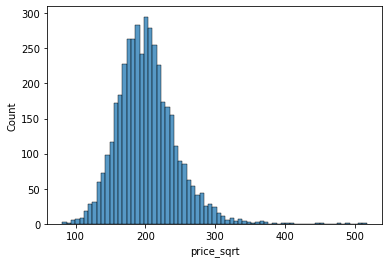

In [171]:
sns.histplot(df.price_sqrt)

In [172]:
df.price_sqrt.min()

81.0134040359405

In [173]:
df.price_sqrt.max()

517.4870466321244

In [174]:
df.price_sqrt.mean()

201.99706721133913

In [175]:
df.price_sqrt.std()

42.26153404923974

In [176]:
df[df.price_sqrt<100].shape

(11, 14)

In [177]:
df[df.price_sqrt>350].shape

(20, 14)

In [178]:
def category_number(x):
    if x <= 147:
        return 1
    elif x<= 160:
        return 2
    elif x <= 240:
        return 3
    elif x<= 263:
        return 4
    else:
        return 5

In [179]:
df["category"]=df.price_sqrt.apply(category_number)

In [180]:
df.category.value_counts()

3    3004
4     353
5     324
2     301
1     300
Name: category, dtype: int64

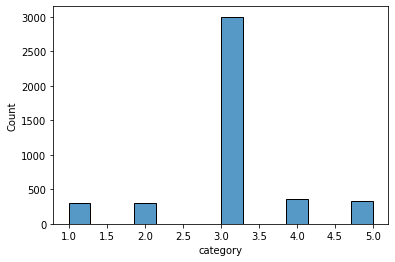

In [181]:
sns.histplot(df.category)

In [182]:
df.head(10)

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA,age,price_sqrt,category
0,1100000.0,85755,-110.992897,32.461571,1.39,19156.00,4,4.0,5164.0,3.0,4,153.0,18,213.013168,3
1,1150000.0,85749,-110.718155,32.279066,11.49,10716.00,4,5.0,4330.0,3.0,3,0.0,12,265.588915,5
2,1200000.0,85750,-110.844774,32.326842,1.21,10610.26,4,4.0,4426.0,3.0,0,117.0,17,271.125169,5
3,1200000.0,85718,-110.948790,32.354580,7.11,7324.90,3,3.0,3528.0,2.0,1,50.0,47,340.136054,5
4,1120150.0,85658,-111.060142,32.456128,2.98,13573.00,4,6.0,4050.0,4.0,2,149.0,12,276.580247,5
5,910000.0,85637,-110.742582,31.631884,58.00,4630.00,3,3.0,3440.0,7.0,3,130.0,32,264.534884,5
6,1000000.0,85755,-110.992170,32.458323,3.49,14400.00,3,4.0,4162.0,3.0,3,166.0,14,240.269101,4
7,1200000.0,85749,-110.714722,32.241059,27.10,7856.00,4,3.0,3855.0,4.0,2,18.0,32,311.284047,5
8,1200000.0,85737,-110.976918,32.407569,3.77,12852.08,4,4.0,4329.0,3.0,2,138.0,14,277.200277,5
9,1200000.0,85750,-110.846659,32.326433,1.05,9450.00,4,3.0,4169.0,3.0,2,110.0,20,287.838810,5


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4282 entries, 0 to 4281
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sold_price  4282 non-null   float64
 1   zipcode     4282 non-null   int64  
 2   longitude   4282 non-null   float64
 3   latitude    4282 non-null   float64
 4   lot_acres   4282 non-null   float64
 5   taxes       4282 non-null   float64
 6   bedrooms    4282 non-null   int64  
 7   bathrooms   4282 non-null   float64
 8   sqrt_ft     4282 non-null   float64
 9   garage      4282 non-null   float64
 10  fireplaces  4282 non-null   int64  
 11  HOA         4282 non-null   float64
 12  age         4282 non-null   int64  
 13  price_sqrt  4282 non-null   float64
 14  category    4282 non-null   int64  
dtypes: float64(10), int64(5)
memory usage: 501.9 KB


In [184]:
df3=df.copy()

# Classification

## KNN

In [185]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [186]:
class KNN():
    
    def fit(self, X,y):
        self.X=X
        self.y=y
    
    def predict(self,X,K):
        epsilon=1e-3
        N=len(X)
        y_hat=np.zeros(N)
        
        for i in range(N):
            dist2=np.sum((self.X-X[i])**2, axis=1)
            idxt=np.argsort(dist2)[:K]
            gamma_k=1/(np.sqrt(dist2[idxt]+epsilon))
            y_hat[i]=np.bincount(self.y[idxt], weights=gamma_k).argmax()
        
        return y_hat

In [187]:
def accuracy(y, y_hat):
    return np.mean(y==y_hat)

In [188]:
def min_max(X):
    return (X-X.min())/(X.max()-X.min())

In [189]:
X_cat=df[["longitude", "latitude"]]
y_cat=df.category

In [190]:
X_cat=X_cat.to_numpy()
y_cat=y_cat.to_numpy()

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X_cat, y_cat, test_size = 0.1, random_state =42)

In [192]:
scr=StandardScaler()
X_train=scr.fit_transform(X_train)
X_test=scr.transform(X_test)

In [193]:
for n in range(2,11):
    knn=KNN()
    knn.fit(X_train,y_train)
    y_hat=knn.predict(X_train,n)
    ac=accuracy(y_train, y_hat)
        
    print(f'{n} : {ac}')

2 : 0.997145081754477
3 : 0.8541396314560084
4 : 0.8110563197508435
5 : 0.7864002076304178
6 : 0.7739423825590449
7 : 0.75966779133143
8 : 0.7552556449519855
9 : 0.751881650661822
10 : 0.7451336620814949


In [194]:
for n in range(2,21):
    knn=KNN()
    knn.fit(X_train,y_train)
    y_train_hat=knn.predict(X_train,n)
    y_test_hat=knn.predict(X_test,n)
    train_ac=accuracy(y_train, y_train_hat)
    test_ac=accuracy(y_test, y_test_hat)
        
    print(f'{n} : {train_ac}, {test_ac}')

2 : 0.997145081754477, 0.6177156177156177
3 : 0.8541396314560084, 0.6433566433566433
4 : 0.8110563197508435, 0.6643356643356644
5 : 0.7864002076304178, 0.6783216783216783
6 : 0.7739423825590449, 0.6806526806526807
7 : 0.75966779133143, 0.682983682983683
8 : 0.7552556449519855, 0.6876456876456877
9 : 0.751881650661822, 0.6923076923076923
10 : 0.7451336620814949, 0.6946386946386947
11 : 0.7420192058136517, 0.696969696969697
12 : 0.7383856735011679, 0.7016317016317016
13 : 0.7339735271217234, 0.7062937062937062
14 : 0.7347521411886841, 0.703962703962704
15 : 0.7337139890994031, 0.7062937062937062
16 : 0.7316376849208409, 0.7062937062937062
17 : 0.7300804567869192, 0.7086247086247086
18 : 0.7282636906306774, 0.710955710955711
19 : 0.7282636906306774, 0.7086247086247086
20 : 0.7285232286529977, 0.7086247086247086


In [195]:
knn=KNN()

In [196]:
knn.fit(X_train,y_train)

In [197]:
y_train_hat=knn.predict(X_train, 18)
y_test_hat=knn.predict(X_test,18)

In [198]:
accuracy(y_train, y_train_hat)

0.7282636906306774

In [199]:
accuracy(y_test, y_test_hat)

0.710955710955711

In [200]:
sample=df[["longitude", "latitude", "category"]].sample(5)
sample

,longitude,latitude,category
3416,-111.004381,32.414932,3
2081,-111.071077,32.264497,5
790,-110.935308,32.291142,3
2138,-110.900196,32.321613,3
349,-110.921262,32.224432,3


In [201]:
pred=sample[["longitude","latitude"]]
pred

,longitude,latitude
3416,-111.004381,32.414932
2081,-111.071077,32.264497
790,-110.935308,32.291142
2138,-110.900196,32.321613
349,-110.921262,32.224432


In [202]:
pred=scr.transform(pred)

In [203]:
test_pred=knn.predict(pred,18)
test_pred


array([3., 3., 3., 3., 3.])

In [204]:
sample["Prediction"]=test_pred
sample

,longitude,latitude,category,Prediction
3416,-111.004381,32.414932,3,3.0
2081,-111.071077,32.264497,5,3.0
790,-110.935308,32.291142,3,3.0
2138,-110.900196,32.321613,3,3.0
349,-110.921262,32.224432,3,3.0


# Model Building 

## Linear Regression 

In [205]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

In [206]:
def OLS(Y,Y_hat, N):
    return (1/(2*N)*np.sum((Y-Y_hat)**2))

In [207]:
def R2(Y,Y_hat):
    return (1-(np.sum((Y-Y_hat)**2)/np.sum((Y-np.mean(Y))**2)))

In [208]:
df.head()

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA,age,price_sqrt,category
0,1100000.0,85755,-110.992897,32.461571,1.39,19156.00,4,4.0,5164.0,3.0,4,153.0,18,213.013168,3
1,1150000.0,85749,-110.718155,32.279066,11.49,10716.00,4,5.0,4330.0,3.0,3,0.0,12,265.588915,5
2,1200000.0,85750,-110.844774,32.326842,1.21,10610.26,4,4.0,4426.0,3.0,0,117.0,17,271.125169,5
3,1200000.0,85718,-110.948790,32.354580,7.11,7324.90,3,3.0,3528.0,2.0,1,50.0,47,340.136054,5
4,1120150.0,85658,-111.060142,32.456128,2.98,13573.00,4,6.0,4050.0,4.0,2,149.0,12,276.580247,5


In [209]:
df_reg=df[["sold_price","lot_acres", "taxes","bedrooms", "bathrooms",
         "sqrt_ft","garage", "fireplaces", "HOA","age","category"]]

In [210]:
df_reg.head()

,sold_price,lot_acres,taxes,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA,age,category
0,1100000.0,1.39,19156.00,4,4.0,5164.0,3.0,4,153.0,18,3
1,1150000.0,11.49,10716.00,4,5.0,4330.0,3.0,3,0.0,12,5
2,1200000.0,1.21,10610.26,4,4.0,4426.0,3.0,0,117.0,17,5
3,1200000.0,7.11,7324.90,3,3.0,3528.0,2.0,1,50.0,47,5
4,1120150.0,2.98,13573.00,4,6.0,4050.0,4.0,2,149.0,12,5


In [211]:
X=df_reg.drop("sold_price", axis=1)
y=df_reg.sold_price

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state =42)

In [213]:
print(f'Train size : {X_train.shape}')
print(f'Test Size : {X_test.shape}')

Train size : (3853, 10)
Test Size : (429, 10)


In [214]:
scaler=StandardScaler()

In [215]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [216]:
lnr=LinearRegression()
scores = cross_validate(lnr, X_train_scaled, y_train, scoring ="r2", cv = 5)

In [217]:
scores=pd.DataFrame(scores, index = range(1,6))
scores

,fit_time,score_time,test_score
1,0.009933,0.001144,0.791711
2,0.003145,0.000764,0.789402
3,0.002462,0.000732,0.804057
4,0.002343,0.000683,0.795048
5,0.002360,0.000700,0.781397


In [218]:
scores.iloc[:,2].mean()

0.7923229699176793

In [219]:
lnr.fit(X_train_scaled,y_train)

LinearRegression()

In [220]:
y_train_pred=lnr.predict(X_train_scaled)
y_test_pred=lnr.predict(X_test_scaled)

In [221]:
r2_score(y_train,y_train_pred)

0.7940819409819131

In [222]:
r2_score(y_test,y_test_pred)

0.797617434468753

In [223]:
residuals = y_test-y_test_pred

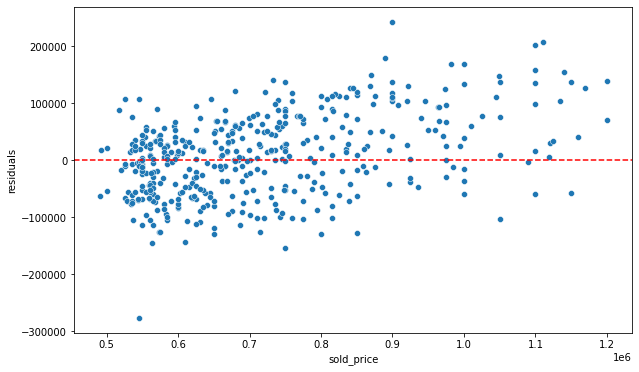

In [224]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_test, y = residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()

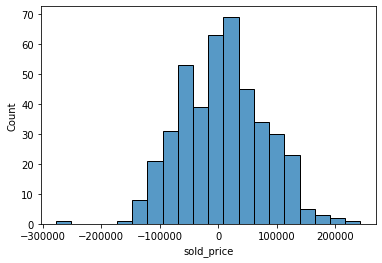

In [225]:
sns.histplot(residuals);

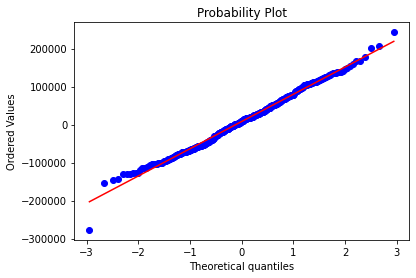

In [226]:
stats.probplot(residuals, dist ="norm", plot =plt);

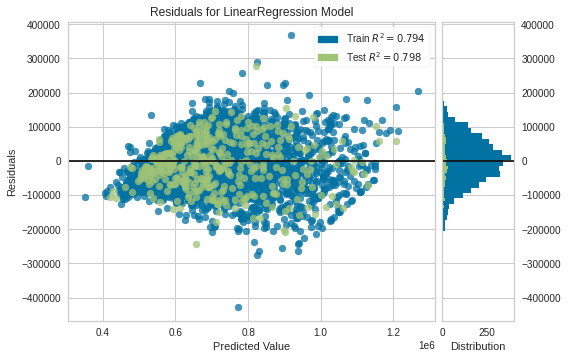

In [227]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show(); 

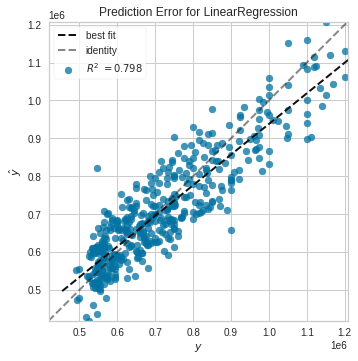

In [228]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show();

In [229]:
lnr=LinearRegression()

In [230]:
lnr.fit(X_train_scaled,y_train)

LinearRegression()

In [231]:
coef=lnr.coef_.round()
coef

array([ -3464.,  16082.,  -3614.,   6448., 115842.,    350.,   9335.,
         8942.,  -6282., 111387.])

In [232]:
df_coef = pd.DataFrame(coef, index = X.columns, columns = ["Coefficient"] )

In [233]:
a=df_coef.sort_values(by="Coefficient", ascending=False)
a

,Coefficient
sqrt_ft,115842.0
category,111387.0
taxes,16082.0
fireplaces,9335.0
HOA,8942.0
bathrooms,6448.0
garage,350.0
lot_acres,-3464.0
bedrooms,-3614.0
age,-6282.0


In [234]:
lnr.intercept_

698752.5663534909

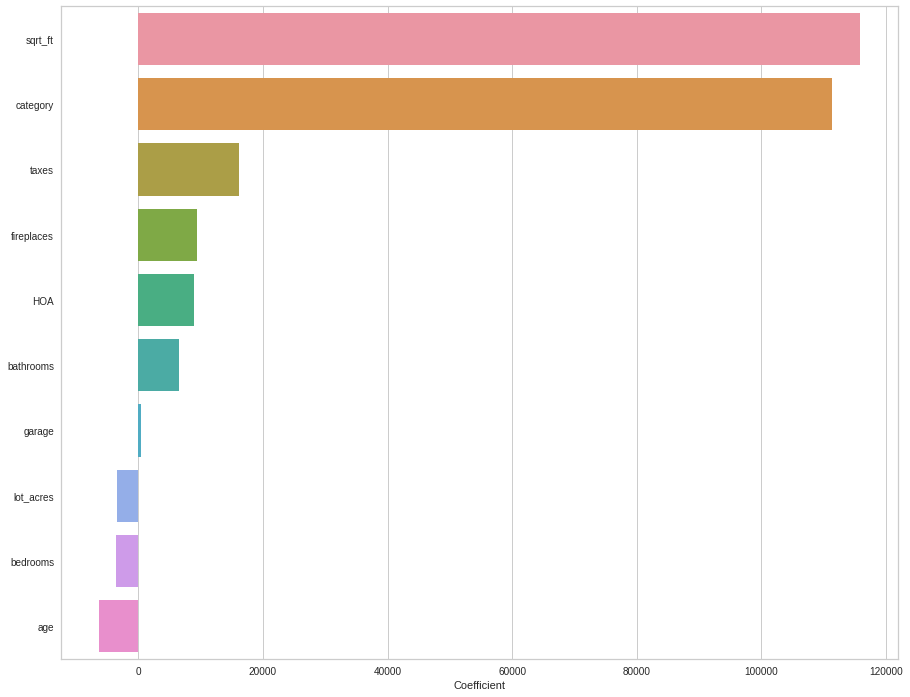

In [235]:
plt.figure(figsize=(15,12))
ax = sns.barplot(x=a.Coefficient, y=a.index)
plt.show()

## Prediction 

In [236]:
X_scaled=scaler.fit_transform(X)

In [237]:
final_model = LinearRegression()

In [238]:
final_model.fit(X_scaled, y)

LinearRegression()

In [239]:
df2["Price"]=df2.sold_price
df2.drop(columns=["sold_price","zipcode"], inplace=True)

In [240]:
df_sample=df2.sample(10)
df_sample

,longitude,latitude,lot_acres,taxes,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA,age,Price
1059,-110.944253,32.305571,0.66,6768.79,4,3.0,4013.0,3.0,1,5.0,10,769000.0
3725,-110.991338,32.428438,0.84,5377.50,4,4.0,2868.0,3.0,1,79.0,15,575000.0
2304,-111.080803,32.316301,4.01,6488.80,4,3.0,3059.0,3.0,3,62.0,17,658000.0
642,-110.937029,32.296177,0.88,7263.88,5,4.0,3865.0,3.0,4,0.0,14,876000.0
1988,-110.843814,32.324205,0.22,6231.95,4,3.0,2903.0,2.0,1,142.0,23,675000.0
3181,-110.724523,32.120572,3.77,3898.11,3,4.0,3313.0,6.0,1,0.0,23,565000.0
1367,-110.860668,32.315365,1.30,5380.38,4,3.0,3463.0,3.0,2,42.0,40,745000.0
142,-110.857500,32.543025,0.28,5175.48,3,4.0,3700.0,4.0,1,165.0,9,1100000.0
2136,-111.068942,32.435015,0.23,7691.78,4,3.0,2807.0,3.0,2,41.0,6,670000.0
1446,-110.905850,32.327731,0.72,5886.00,5,3.0,3562.0,2.0,1,7.0,46,700000.0


In [241]:
df_sample_loc=df_sample[["longitude", "latitude"]]
df_sample_loc

,longitude,latitude
1059,-110.944253,32.305571
3725,-110.991338,32.428438
2304,-111.080803,32.316301
642,-110.937029,32.296177
1988,-110.843814,32.324205
3181,-110.724523,32.120572
1367,-110.860668,32.315365
142,-110.857500,32.543025
2136,-111.068942,32.435015
1446,-110.905850,32.327731


In [242]:
df_sample_loc_scaled=scr.transform(df_sample_loc)

In [243]:
clas_pred=knn.predict(df_sample_loc_scaled,3)
clas_pred

array([3., 3., 3., 3., 3., 3., 3., 5., 3., 3.])

In [244]:
df_sample_loc["Category"]=clas_pred
df_sample_loc

,longitude,latitude,Category
1059,-110.944253,32.305571,3.0
3725,-110.991338,32.428438,3.0
2304,-111.080803,32.316301,3.0
642,-110.937029,32.296177,3.0
1988,-110.843814,32.324205,3.0
3181,-110.724523,32.120572,3.0
1367,-110.860668,32.315365,3.0
142,-110.857500,32.543025,5.0
2136,-111.068942,32.435015,3.0
1446,-110.905850,32.327731,3.0


In [245]:
df_sample_reg=df_sample.drop(columns=["longitude", "latitude", "Price"])


In [246]:
df_sample_reg["Category"]=clas_pred
df_sample_reg

,lot_acres,taxes,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA,age,Category
1059,0.66,6768.79,4,3.0,4013.0,3.0,1,5.0,10,3.0
3725,0.84,5377.50,4,4.0,2868.0,3.0,1,79.0,15,3.0
2304,4.01,6488.80,4,3.0,3059.0,3.0,3,62.0,17,3.0
642,0.88,7263.88,5,4.0,3865.0,3.0,4,0.0,14,3.0
1988,0.22,6231.95,4,3.0,2903.0,2.0,1,142.0,23,3.0
3181,3.77,3898.11,3,4.0,3313.0,6.0,1,0.0,23,3.0
1367,1.30,5380.38,4,3.0,3463.0,3.0,2,42.0,40,3.0
142,0.28,5175.48,3,4.0,3700.0,4.0,1,165.0,9,5.0
2136,0.23,7691.78,4,3.0,2807.0,3.0,2,41.0,6,3.0
1446,0.72,5886.00,5,3.0,3562.0,2.0,1,7.0,46,3.0


In [247]:
df_sample_reg_scaled=scaler.transform(df_sample_reg)

In [248]:
reg_pred=final_model.predict(df_sample_reg_scaled)
reg_pred

array([754748.20104552, 590695.85482049, 631943.12187517, 763500.37676615,
       597859.33483889, 638093.61585345, 664385.46067066, 992114.88831994,
       596738.54884206, 661787.32324138])

In [249]:
df_sample_reg["Price"]=df_sample.Price
df_sample_reg["Prediction"]=reg_pred

In [250]:
df_sample_reg

,lot_acres,taxes,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA,age,Category,Price,Prediction
1059,0.66,6768.79,4,3.0,4013.0,3.0,1,5.0,10,3.0,769000.0,754748.201046
3725,0.84,5377.50,4,4.0,2868.0,3.0,1,79.0,15,3.0,575000.0,590695.854820
2304,4.01,6488.80,4,3.0,3059.0,3.0,3,62.0,17,3.0,658000.0,631943.121875
642,0.88,7263.88,5,4.0,3865.0,3.0,4,0.0,14,3.0,876000.0,763500.376766
1988,0.22,6231.95,4,3.0,2903.0,2.0,1,142.0,23,3.0,675000.0,597859.334839
3181,3.77,3898.11,3,4.0,3313.0,6.0,1,0.0,23,3.0,565000.0,638093.615853
1367,1.30,5380.38,4,3.0,3463.0,3.0,2,42.0,40,3.0,745000.0,664385.460671
142,0.28,5175.48,3,4.0,3700.0,4.0,1,165.0,9,5.0,1100000.0,992114.888320
2136,0.23,7691.78,4,3.0,2807.0,3.0,2,41.0,6,3.0,670000.0,596738.548842
1446,0.72,5886.00,5,3.0,3562.0,2.0,1,7.0,46,3.0,700000.0,661787.323241
